# Assignment 2 - CS 203 - Group 19


---


> Parthiv Patel : 23110237
---




> Aryan Solanki : 23110049


---




In [ ]:
!pip install pandera

In [ ]:
!rm -rf gx
!pip install pandas
!pip install great_expectations -q

## Assignment 2 - Data Validation

### Team:

**Aryan Solanki - 23110049**

**Parthiv Patel - 23110237**

## Objective
This assignment aims to familiarize students with modern data validation techniques using Pandera and Great Expectations frameworks through hands-on experience with real-world fitness data. Students will learn to implement various validation rules, from basic data type checking to complex cross-column validations, while understanding the strengths and limitations of each framework.

### Dataset Preparation

1. Download the data from [this link](https://s3.amazonaws.com/tripdata/202412-citibike-tripdata.zip) using the `curl` or `wget` command.

2. **Key fields to validate:**
   - `ride_id` (string)
   - `rideable_type` (categorical)
   - `started_at` (datetime)
   - `ended_at` (datetime)
   - `start_station_name` (string)
   - `start_station_id` (string)
   - `end_station_name` (string)
   - `end_station_id` (string)
   - `start_lat`, `start_lng` (float)
   - `end_lat`, `end_lng` (float)
   - `member_casual` (categorical)

### Features to Implement

#### Pandera Validation Rules:
1. Validate the datatype of each column. **[20%]**
2. Analyze each feature and write an appropriate check/scheme for them. For example, for `rideable_type` check the unique options and ensure that no other entry passes the check. **[20%]**
3. Add data validation rules to verify that a ride's end time occurs after its start time using Pandera's decorator functionality. **[10%]**

#### Great Expectations Suite:
1. Validate the datatype of each column by creating an expectation suite. **[20%]**
2. Implement an Action that will send a mail when encountering a failure. Take a screenshot of the mail and attach it to the submission file. **[20%]**

#### Code Quality:
1. Maintain clean, modular, and readable code. **[5%]**
2. Provide comments where necessary. **[5%]**

## Extracting Dataset

In [ ]:
!wget https://s3.amazonaws.com/tripdata/202412-citibike-tripdata.zip


--2025-01-19 12:56:07--  https://s3.amazonaws.com/tripdata/202412-citibike-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.165.232, 52.217.126.224, 52.217.231.144, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.165.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 450888449 (430M) [application/zip]
Saving to: ‘202412-citibike-tripdata.zip.1’

202412-citibike-tri 100%[===================>] 430.00M  50.1MB/s    in 9.1s    

2025-01-19 12:56:16 (47.4 MB/s) - ‘202412-citibike-tripdata.zip.1’ saved [450888449/450888449]



In [ ]:
!unzip 202412-citibike-tripdata.zip

Archive:  202412-citibike-tripdata.zip
replace 202412-citibike-tripdata_1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: 202412-citibike-tripdata_1.csv  
replace 202412-citibike-tripdata_3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: 202412-citibike-tripdata_3.csv  
replace 202412-citibike-tripdata_2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: 202412-citibike-tripdata_2.csv  


In [ ]:
import pandas as pd
import pandera as pa

df = pd.read_csv("/content/202412-citibike-tripdata_1.csv")

df.head()

<ipython-input-5-d2995b9a350f>:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/202412-citibike-tripdata_1.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B44E5B10AEE58AD0,classic_bike,2024-12-14 10:58:18.153,2024-12-14 11:11:11.308,Frederick Douglass Blvd & W 145 St,7954.12,E 138 St & 5 Ave,7809.13,40.823061,-73.941928,40.814490,-73.936153,member
1,BC252DC6A6011556,electric_bike,2024-12-12 14:46:12.473,2024-12-12 16:45:37.777,Madison Ave & E 99 St,7443.01,NaN,NaN,40.789485,-73.952429,40.780000,-73.960000,member
2,6FBE55EF6FE8736D,electric_bike,2024-12-11 07:55:18.770,2024-12-11 08:02:23.460,Columbia St & Kane St,4422.05,NaN,NaN,40.687632,-74.001626,40.690000,-74.000000,member
3,908890DE7FDCF9FE,electric_bike,2024-12-09 22:51:11.668,2024-12-09 22:57:43.495,E 13 St & 2 Ave,5820.08,E 10 St & 2 Ave,5746.02,40.731539,-73.985302,40.729708,-73.986598,member
4,D5D366379A4DC0A8,classic_bike,2024-12-10 18:48:40.063,2024-12-10 19:10:32.264,11 Ave & W 41 St,6726.01,E 25 St & 1 Ave,6004.07,40.760301,-73.998842,40.738177,-73.977387,member


## Pandera Validation


In [ ]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [ ]:
# - ride_id (string)
#    - rideable_type (categorical)
#    - started_at (str)
#    - ended_at (str)
#    - start_station_name (string)
#    - start_station_id (string)
#    - end_station_name (string)
#    - end_station_id (string)
#    - start_lat, start_lng (float)
#    - end_lat, end_lng (float)
#    - member_casual (categorical)

# FROM THE Q


#### Validate the datatype of each column. `[10%]`



In [ ]:
schema_field_dtypes = pa.DataFrameSchema(
    {
        "ride_id": pa.Column(str),
        "rideable_type": pa.Column(pa.Category),
        "started_at": pa.Column(str),
        "ended_at": pa.Column(str),
        "start_station_name": pa.Column(str),
        "start_station_id": pa.Column(str),
        "end_station_name": pa.Column(str),
        "end_station_id": pa.Column(str),
        "start_lat": pa.Column(float),
        "start_lng": pa.Column(float),
        "end_lat": pa.Column(float),
        "end_lng": pa.Column(float),
        "member_casual": pa.Column(pa.Category),
    },
    index=pa.Index(int),  # Index remains as an integer type
)


#### Analyze each feature and write an appropriate check/scheme for them. For example, for `rideable_type` check the unique options and ensure that no other entry passes the check. `[20%]`


In [ ]:
schema_with_rules = pa.DataFrameSchema(
    {
        "ride_id": pa.Column(
            str,
            checks=pa.Check.str_length(1, 50)  # Ensure ride_id is between 1 and 50 characters
        ),
        "rideable_type": pa.Column(
            pa.Category, checks=pa.Check.isin(["classic_bike", "electric_bike"])
        ),
        "started_at": pa.Column(
            str, checks=pa.Check.str_matches(r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3}$")
        ),
        "ended_at": pa.Column(
            str, checks=pa.Check.str_matches(r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d{3}$")
        ),
        "start_station_name": pa.Column(str, nullable=True,
            checks=pa.Check.str_length(1, 100)  # Ensure names are between 1 and 100 characters
        ),
        "start_station_id": pa.Column(float, nullable=True),
        "end_station_name": pa.Column(str, nullable=True,
            checks=pa.Check.str_length(1, 100)  # Ensure names are between 1 and 100 characters
        ),
        "end_station_id": pa.Column(float, nullable=True),
        "start_lat": pa.Column(float, checks=pa.Check.in_range(-90, 90)),
        "start_lng": pa.Column(float, checks=pa.Check.in_range(-180, 180)),
        "end_lat": pa.Column(float, checks=pa.Check.in_range(-90, 90)),
        "end_lng": pa.Column(float, checks=pa.Check.in_range(-180, 180)),
        "member_casual": pa.Column(
            pa.Category, checks=pa.Check.isin(["member", "casual"])
        ),
    },
    index=pa.Index(int),
)


#### Add data validation rules to verify that a ride's end time occurs after its start time using Pandera's decorator functionality. `[10%]`

In [ ]:
from pandera.decorators import check_input

# Define a custom validation function to ensure ended_at > started_at
@check_input(schema_with_rules)
def validate_end_after_start(df: pd.DataFrame) -> pd.DataFrame:
    # Convert started_at and ended_at columns to datetime
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["ended_at"] = pd.to_datetime(df["ended_at"])

    # Check for invalid rows
    invalid_rows = df[df["ended_at"] <= df["started_at"]]
    if not invalid_rows.empty:
        raise ValueError("Some rides have end times earlier than or equal to start times!")

    return df

# Load the data
df = pd.read_csv(
    "/content/202412-citibike-tripdata_1.csv",
    dtype={
        "start_station_id": "str",
        "end_station_id": "str",
        "rideable_type": "category",
        "member_casual": "category",
    },
    low_memory=False
)

# Convert station IDs to numeric, handling invalid entries
columns_to_convert = ["start_station_id", "end_station_id"]

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with NaN values
df = df.dropna()

# Validate the schema
validated_df = schema_with_rules.validate(df)

# Apply the custom time validation
validated_df = validate_end_after_start(validated_df)

print("Validation passed successfully!")

Validation passed successfully!


## Great Expectations Suite

In [ ]:
from tabulate import tabulate
from rich.console import Console
from rich.table import Table

#### Fetchin dataset as a dataframe and preliminary analysis

In [ ]:
df_gx = pd.read_csv("/content/202412-citibike-tripdata_1.csv")

<ipython-input-12-ccfcc943a647>:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gx = pd.read_csv("/content/202412-citibike-tripdata_1.csv")


In [ ]:
console = Console()

#Column names
console.print("[bold blue]Columns Names:[/bold blue]")
columns_table = Table(show_header=False)
for col in df_gx.columns:
    columns_table.add_row(col)
console.print(columns_table)

#Row-wise null values
console.print("[bold blue]Row Wise Null Values:[/bold blue]")
null_table = Table(show_header=True, header_style="bold magenta")
null_table.add_column("Column", style="dim")
null_table.add_column("Null Values")
for col, null_count in df_gx.isnull().sum().items():
    null_table.add_row(col, str(null_count))
console.print(null_table)

#Describe function
console.print("[bold blue]Describe Function Output:[/bold blue]")
describe_table = Table(show_header=True, header_style="bold cyan")
describe = df_gx.describe(include='all').reset_index()

#Add columns to the table
describe_table.add_column("Statistic")
for column in describe.columns[1:]:
    describe_table.add_column(column)

#Add rows to the table
for row in describe.values:
    describe_table.add_row(*[str(x) for x in row])
console.print(describe_table)

Columns Names:

┌────────────────────┐
│ ride_id            │
│ rideable_type      │
│ started_at         │
│ ended_at           │
│ start_station_name │
│ start_station_id   │
│ end_station_name   │
│ end_station_id     │
│ start_lat          │
│ start_lng          │
│ end_lat            │
│ end_lng            │
│ member_casual      │
└────────────────────┘

Row Wise Null Values:

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Column             ┃ Null Values ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ ride_id            │ 0           │
│ rideable_type      │ 0           │
│ started_at         │ 0           │
│ ended_at           │ 0           │
│ start_station_name │ 625         │
│ start_station_id   │ 625         │
│ end_station_name   │ 3583        │
│ end_station_id     │ 4475        │
│ start_lat          │ 0           │
│ start_lng          │ 0           │
│ end_lat            │ 205         │
│ end_lng            │ 205         │
│ member_casual      │ 0           │
└────────────────────┴─────────────┘

Describe Function Output:

┏━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓
┃ Stat… ┃ ride… ┃ ride… ┃ star… ┃ ende… ┃ star… ┃ star… ┃ end_… ┃ end_… ┃ star… ┃ star… ┃ end_l… ┃ end_… ┃ membe… ┃
┡━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩
│ count │ 1000… │ 1000… │ 1000… │ 1000… │ 9993… │ 9993… │ 9964… │ 9955… │ 1000… │ 1000… │ 99979… │ 9997… │ 10000… │
│ uniq… │ 1000… │ 2     │ 9992… │ 9992… │ 2137  │ 3741  │ 2129  │ 2584  │ nan   │ nan   │ nan    │ nan   │ 2      │
│ top   │ 4186… │ elec… │ 2024… │ 2024… │ W 21  │ 6140… │ W 21  │ 5905… │ nan   │ nan   │ nan    │ nan   │ member │
│       │       │       │ 15:3… │ 08:4… │ St &  │       │ St &  │       │       │       │        │       │        │
│       │       │       │       │       │ 6 Ave │       │ 6 Ave │       │       │       │        │       │        │
│ freq  │ 1     │ 6936… │ 3     │ 14    │ 3911  │ 3854  │ 4946  │ 4257  │ nan   │ nan   │ nan    │ nan   │ 885113 │
│ mean  │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ 40.7… │ -73.… │ 40.73… │ -73.… │ nan    │
│ std   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ 0.04… │ 0.02… │ 0.081… │ 0.13… │ nan    │
│ min   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ 40.6… │ -74.… │ 0.0    │ -74.… │ nan    │
│ 25%   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ 40.7… │ -73.… │ 40.71… │ -73.… │ nan    │
│ 50%   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ 40.7… │ -73.… │ 40.73… │ -73.… │ nan    │
│ 75%   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ 40.7… │ -73.… │ 40.76… │ -73.… │ nan    │
│ max   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ nan   │ 40.8… │ -73.… │ 40.93  │ 0.0   │ nan    │
└───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴────────┴───────┴────────┘

#### Key imports and setup

In [ ]:
import great_expectations as gx
from great_expectations.data_context.types.base import DataContextConfig
from great_expectations.checkpoint import CheckpointResult

In [ ]:
#1. Create a Data Context
#core object in Great Expectations for managing configurations, including datasources, expectations, and validations.
context = gx.get_context(mode="file")

print(type(context).__name__)

FileDataContext


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#2. Set up a Datasource (CSV file example)
data_source_name = "my_data_source"
data_source = context.data_sources.add_pandas(name=data_source_name)


#Data Asset is used to group your Validation Results.
data_asset_name = "my_dataframe_data_asset"
data_asset = data_source.add_dataframe_asset(name=data_asset_name)

In [ ]:
#3. Create a Batch from the DataFrame

batch_definition = data_asset.add_batch_definition_whole_dataframe("batch definition")
batch_parameters = {"dataframe": df_gx}
batch = batch_definition.get_batch(batch_parameters)
batch.head(3)

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

            ride_id  rideable_type               started_at  \
0  B44E5B10AEE58AD0   classic_bike  2024-12-14 10:58:18.153   
1  BC252DC6A6011556  electric_bike  2024-12-12 14:46:12.473   
2  6FBE55EF6FE8736D  electric_bike  2024-12-11 07:55:18.770   

                  ended_at                  start_station_name  \
0  2024-12-14 11:11:11.308  Frederick Douglass Blvd & W 145 St   
1  2024-12-12 16:45:37.777               Madison Ave & E 99 St   
2  2024-12-11 08:02:23.460               Columbia St & Kane St   

  start_station_id  end_station_name end_station_id  start_lat  start_lng  \
0          7954.12  E 138 St & 5 Ave        7809.13  40.823061 -73.941928   
1          7443.01               NaN            NaN  40.789485 -73.952429   
2          4422.05               NaN            NaN  40.687632 -74.001626   

    end_lat    end_lng member_casual  
0  40.81449 -73.936153        member  
1  40.78000 -73.960000        member  
2  40.69000 -74.000000        member  

#### Building expectation suite

In [ ]:
suite_name = "my_datatype_exp_suite"
suite = gx.ExpectationSuite(name=suite_name)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
suite = context.suites.add(suite)

In [ ]:
#object type = string representation in pandas.
#even categorical class is string.
column_datatypes={
    "ride_id": "object",
    "rideable_type": "object",
    "started_at": "object",
    "ended_at": "object",
    "start_station_name": "object",
    "start_station_id": "object",
    "end_station_name": "object",
    "end_station_id": "object",
    "start_lat": "float64",
    "start_lng": "float64",
    "end_lat": "float64",
    "end_lng": "float64",
    "member_casual": "object"
}

In [ ]:
# 1.1 implementation as per assignment.
for i in range(len(df_gx.columns)):
  expt=gx.expectations.ExpectColumnValuesToBeOfType(
      column=df_gx.columns[i],
      type_=column_datatypes[df_gx.columns[i]]
  )
  suite.add_expectation(expt)
  #print(expt)

#### Few additional expectations (added for practice of gx)

In [ ]:
# additional implementation -> values in set, and numeric in range
# these are additional expectations beyond the scope of the assignment to practice more data validation with gx

lst_additional_expt = []

expectation_add1 = gx.expectations.ExpectColumnValuesToBeInSet(column="rideable_type",
                                                            value_set=["classic_bike",
                                                                       "electric_bike"
                                                                       ])
lst_additional_expt.append(expectation_add1)

expectation_add2 = gx.expectations.ExpectColumnValuesToBeInSet(column="member_casual",
                                                            value_set=["member",
                                                                       "casual"
                                                                       ])
lst_additional_expt.append(expectation_add2)

expectation_add3 = gx.expectations.ExpectColumnValuesToBeBetween(
     column="start_lat", min_value=-90, max_value=90
)
lst_additional_expt.append(expectation_add3)

expectation_add4 = gx.expectations.ExpectColumnValuesToBeBetween(
     column="end_lat", min_value=-90, max_value=90
)
lst_additional_expt.append(expectation_add4)

expectation_add5 = gx.expectations.ExpectColumnValuesToBeBetween(
     column="start_lng", min_value=-180, max_value=180
)
lst_additional_expt.append(expectation_add5)

expectation_add6 = gx.expectations.ExpectColumnValuesToBeBetween(
     column="end_lng", min_value=-180, max_value=180
)
lst_additional_expt.append(expectation_add6)

for expt in lst_additional_expt:
     suite.add_expectation(expt)

###  Validate the datatype of each column by creating an expectation suite. `[20%]`

In [ ]:
definition_name = "my_validation_definition"
validation_definition = gx.ValidationDefinition(
    data=batch_definition, suite=suite, name=definition_name
)

In [ ]:
#Save the validation defintion to your context
validation_definition = context.validation_definitions.add(validation_definition)

In [ ]:
#Running validation

validation_definition_name = "my_validation_definition"
validation_definition = context.validation_definitions.get(validation_definition_name)

validation_results = validation_definition.run(batch_parameters=batch_parameters)
print(validation_results)

Calculating Metrics:   0%|          | 0/48 [00:00<?, ?it/s]

{
  "success": true,
  "results": [
    {
      "success": true,
      "expectation_config": {
        "type": "expect_column_values_to_be_of_type",
        "kwargs": {
          "batch_id": "my_data_source-my_dataframe_data_asset",
          "column": "ride_id",
          "type_": "object"
        },
        "meta": {},
        "id": "9d96b4aa-ba32-4650-8c7d-8392ba5ac7c6"
      },
      "result": {
        "observed_value": "object_"
      },
      "meta": {},
      "exception_info": {
        "raised_exception": false,
        "exception_traceback": null,
        "exception_message": null
      }
    },
    {
      "success": true,
      "expectation_config": {
        "type": "expect_column_values_to_be_of_type",
        "kwargs": {
          "batch_id": "my_data_source-my_dataframe_data_asset",
          "column": "rideable_type",
          "type_": "object"
        },
        "meta": {},
        "id": "45efa8f9-2f76-493c-b5f3-bfa44ac4dec1"
      },
      "result": {
        "obser

### Validation definition

In [ ]:
context = gx.get_context()
validation_definitions = [
    context.validation_definitions.get(validation_definition_name)

]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Implement an Action that will send a mail when encountering a failure. Take a screenshot of the mail and attach it to the submission file. `[20%]`

#### Imports and Pre-email setup

In [ ]:
from great_expectations.checkpoint import (
    EmailAction
)
context = gx.get_context()
validation_definitions = [
    context.validation_definitions.get("my_validation_definition")
]

email_action =[EmailAction(
    name="send_email_on_failure",
    smtp_address='smtp.gmail.com',
    smtp_port=587,
    receiver_emails="23110237@iitgn.ac.in",
    sender_login="23110049@iitgn.ac.in",
    sender_password="rzok wlab abzg xain", #this password is now deleted as good coding practice.
    use_tls=True,
    notify_on="all",
)]

In [ ]:
checkpoint_name = "my_checkpoint_final"
checkpoint = gx.Checkpoint(
    name=checkpoint_name,
    validation_definitions=validation_definitions,
    actions=email_action,
    result_format={"result_format": "COMPLETE"},
)

# Save the Checkpoint to the Data Context
context.checkpoints.add(checkpoint)

# Retrieve the Checkpoint later
checkpoint = context.checkpoints.get(checkpoint_name)

In [ ]:
validation_results = checkpoint.run(
    batch_parameters=batch_parameters, expectation_parameters=suite
)

Calculating Metrics:   0%|          | 0/48 [00:00<?, ?it/s]

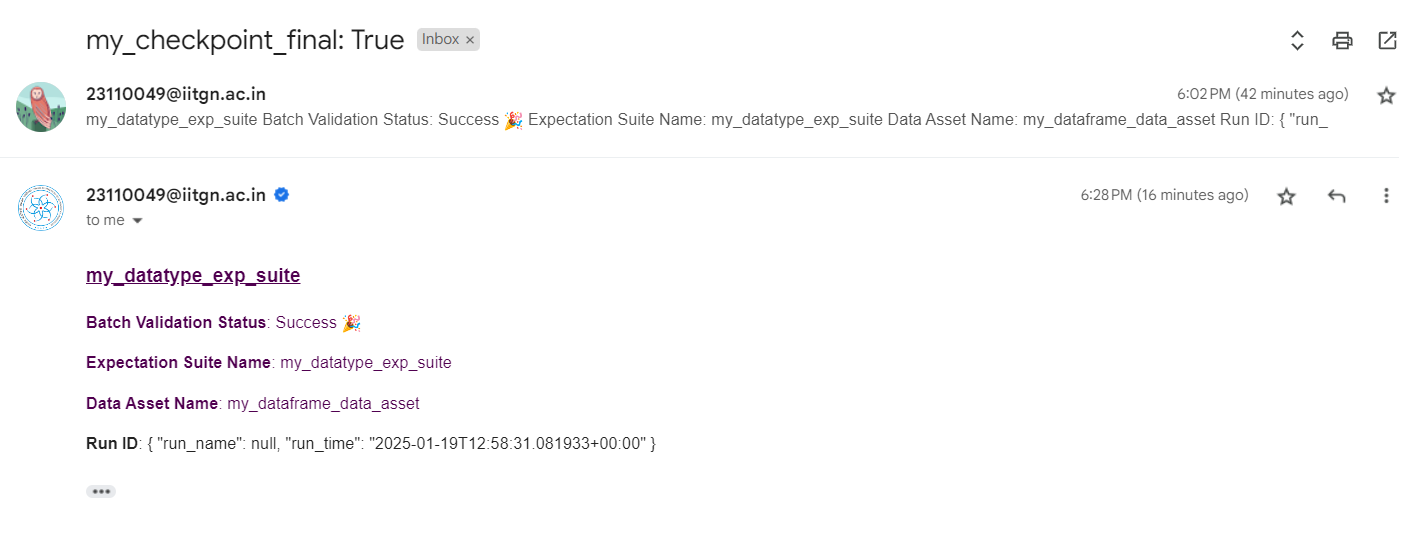